<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>2</code><b>

<b>Group Members:3</b>  

1. <code><Member_1_firstname>Ashutosh Sagar B00936895</code>
2. <code><Member_2_firstname>Ishan Makadia B00931915</code>
3. <code><Member_3_firstname>Meet Sinojia B00933562</code>


# 1. Dataset Information

<h4> Dataset Name: <code>E-Commerce Data</code></h4>
<h4> Link to the Dataset: <code>https://www.kaggle.com/datasets/carrie1/ecommerce-data</code> </h4>
<h4> Dataset Description: </h4>
<code> An e-commerce dataset contains transactions from a UK-based non-store online retail between December 1st, 2010 and December 9th, 2011. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The dataset contains approx 500k rows and 8 feature variables.
</code>

| Field Name  | Type     | Description                                                                                   |
|-------------|----------|-----------------------------------------------------------------------------------------------|
| InvoiceNo   | Nominal  | A 6-digit integral number uniquely assigned to each transaction. 'C' indicates a cancellation. |
| StockCode   | Nominal  | A 5-digit integral number uniquely assigned to each distinct product.                         |
| Description | Nominal  | The name of the product.                                                               |
| Quantity    | Numeric  | The quantities of each product per transaction.                                        |
| InvoiceDate | Numeric  | The date and time when each transaction was generated.                                        |
| UnitPrice   | Numeric  | The product price per unit.                                                       |
| CustomerID  | Nominal  | A 5-digit integral number uniquely assigned to each customer.                                 |
| Country     | Nominal  | The name of the country where each customer resides.                                          |


# 2. Task Information

<h4> Task Goal: <code> Explore, derive insights, and predict revenue from transaction data of a UK-based online retail store</code></h4>
<h4> Task Description: </h4>
    <code>This project aims to analyze and forecast revenue using transaction data from an online retail store based in the United Kingdom. The dataset encompasses various features, including InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. The project involves implementation of machine learning models such as K-Means clustering for data exploration and regression models (Linear Regressor, Decision Tree Regressor, Random Forest Regressor, XGB Regressor) for revenue prediction. Key steps include data cleaning, feature extraction, outlier detection, and model training and evaluation. This project is vital for uncovering patterns and trends in e-commerce data, which can guide strategic decisions and improve customer experiences.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing

In [81]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
from wordcloud import WordCloud
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display, HTML
import plotly.graph_objs as go
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [3]:
# mount google drive as filesystem
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/DAL-MLBD-2023/Project/data.csv'

encoding_type = 'ISO-8859-1'
column_types = {'CustomerID': str, 'InvoiceID': str}

df_initial = pd.read_csv(file_path, encoding=encoding_type, dtype=column_types)

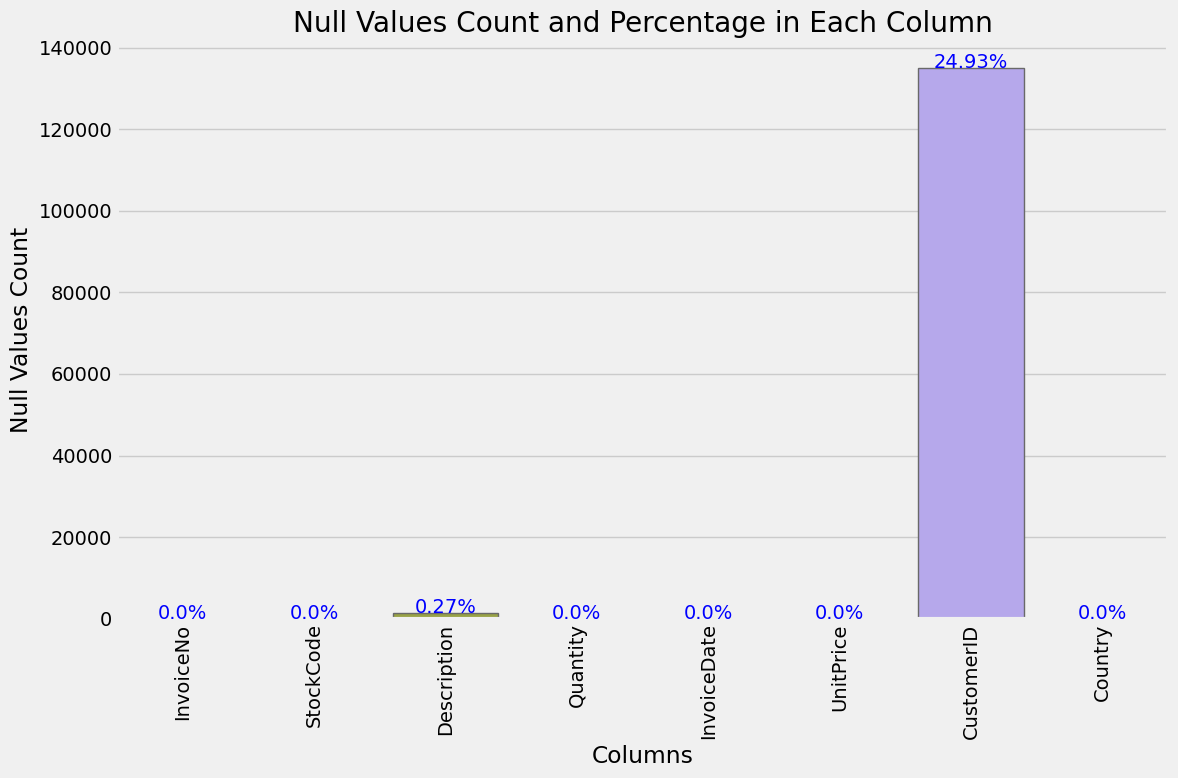

In [6]:
# Calculate null values count and percentage
null_counts = df_initial.isnull().sum()
null_percentages = (null_counts / len(df_initial) * 100).round(2)

# Plotting the number of null values in each column
plt.figure(figsize=(12,8))
barplot = sns.barplot(x=null_counts.index, y=null_counts.values)

# Adding the text annotations for percentages
for index, value in enumerate(null_counts):
    percentage = null_percentages[index]
    plt.text(index, value, f'{percentage}%', color='blue', ha="center")

plt.xticks(rotation=90)
plt.title('Null Values Count and Percentage in Each Column')
plt.ylabel('Null Values Count')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

To address data ambiguity, rows with null values in the 'CustomerID' column are removed from the dataset. This could be due to customers not being registered in the store, and the exact reason for these null values remains unknown.

In [7]:
df_initial.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [8]:
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])
df_initial = df_initial.set_index('InvoiceDate')

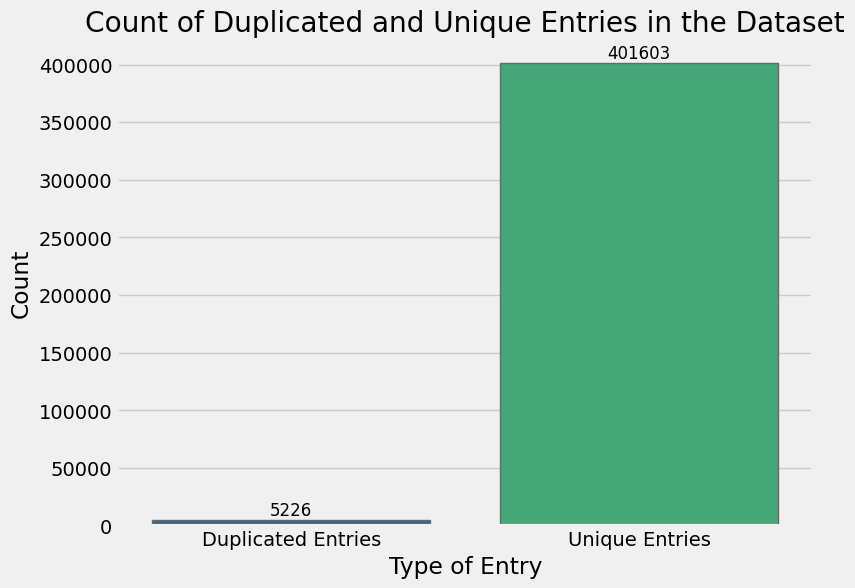

In [9]:
# Calculate the number of duplicated and unique entries
duplicate_count = df_initial.duplicated().sum()
unique_count = len(df_initial) - duplicate_count

# Data for plotting
entries = ['Duplicated Entries', 'Unique Entries']
counts = [duplicate_count, unique_count]

# Creating the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=entries, y=counts, palette='viridis')
plt.title('Count of Duplicated and Unique Entries in the Dataset')
plt.ylabel('Count')
plt.xlabel('Type of Entry')

# Adding counts on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count, f'{count}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [10]:
# remove duplicate
df_initial.drop_duplicates(inplace=True)

unique_count_after = len(df_initial)

duplicate_count = df_initial.duplicated().sum()

print(duplicate_count)

0


In [11]:
df_initial.head(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom


In [12]:
# Calculate the percentage of canceled transactions
cancelled_percentage = (df_initial['InvoiceNo'].str.startswith('C').sum() / len(df_initial)) * 100

# Display the percentage
print(f'Percentage of canceled transactions: {cancelled_percentage:.2f}%')

Percentage of canceled transactions: 2.21%


In [13]:
canceled_transactions = df_initial[df_initial['InvoiceNo'].str.startswith('C')]
canceled_transactions.describe()

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


It's apparent that all canceled transactions involve negative quantities, indicating returns or reductions in ordered items. However, the dataset lacks explicit explanations for the reasons behind customer returns, leaving the possibility of hidden or varied motivations. To maintain data integrity and avoid potential complications stemming from these ambiguous cases, it may be prudent to drop canceled transactions from the dataset. This ensures that the analysis and modeling efforts focus on reliable data and meaningful insights, given the lack of clarity regarding the underlying factors driving these cancellations.

In [14]:
df = df_initial[~df_initial['InvoiceNo'].str.startswith('C')]

In [15]:
cancelled_percentage = (df['InvoiceNo'].str.startswith('C').sum() / len(df)) * 100

print(f'Percentage of canceled transactions: {cancelled_percentage:.2f}%')

Percentage of canceled transactions: 0.00%


### 3.2 Exploratory Data Analysis

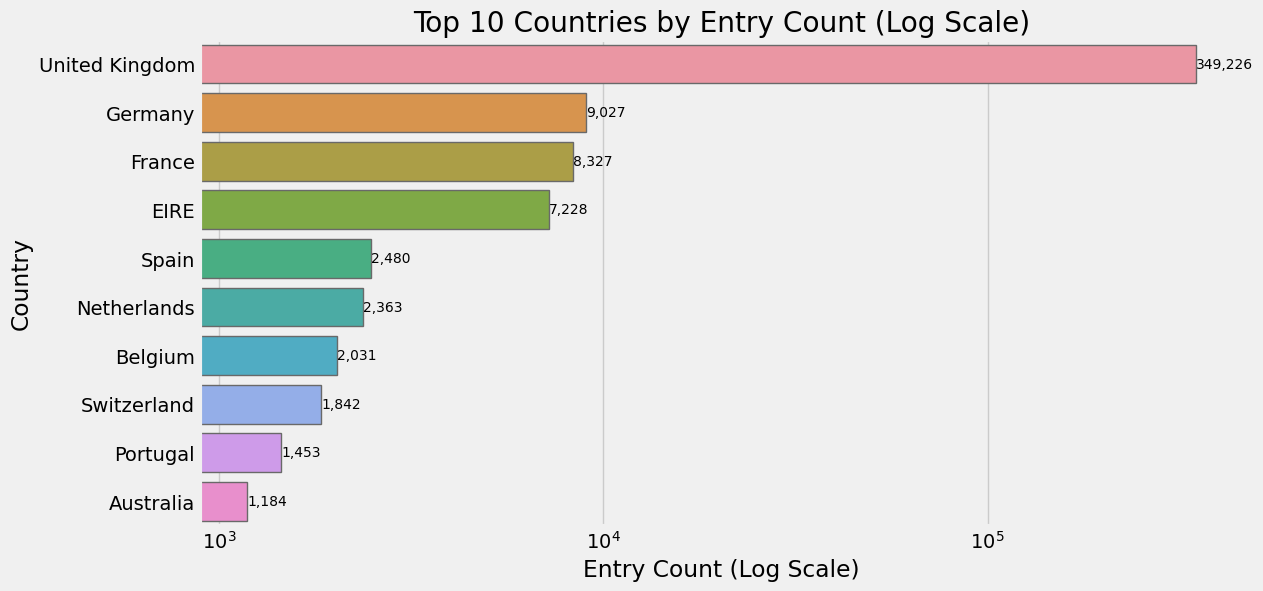

In [16]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Creating the bar chart for country distribution with a logarithmic x-axis scale
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Count', y='Country', data=country_counts.head(10))  # Displaying the top 10 countries
ax.set_xscale('log')  # Set the x-axis scale to logarithmic
plt.title('Top 10 Countries by Entry Count (Log Scale)')
plt.xlabel('Entry Count (Log Scale)')
plt.ylabel('Country')

# Annotate count values at the end of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.show()

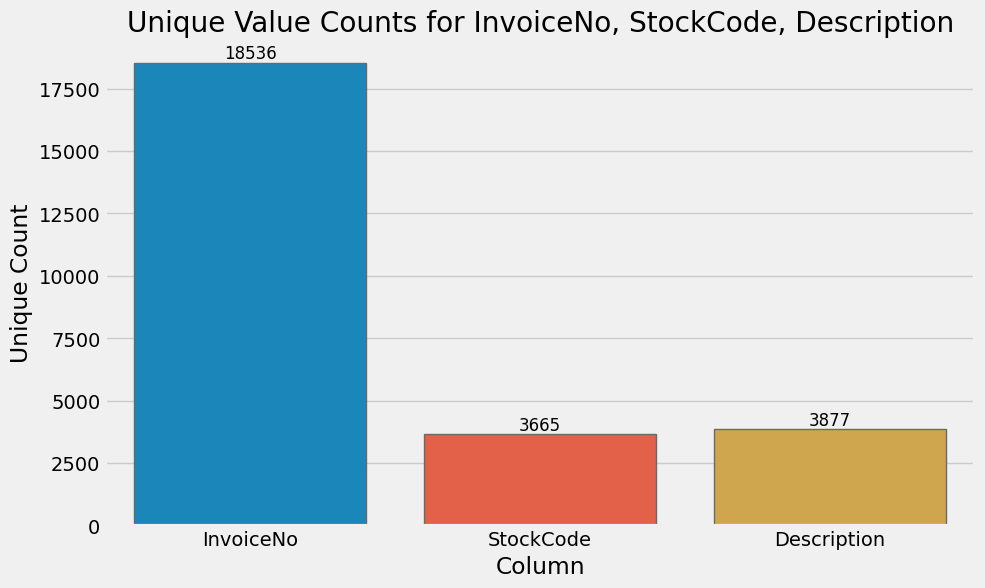

In [17]:
columns = ['InvoiceNo', 'StockCode', 'Description']

unique_invoice_no = df['InvoiceNo'].nunique()
unique_stock_code = df['StockCode'].nunique()
unique_description = df['Description'].nunique()

unique_counts = [unique_invoice_no, unique_stock_code, unique_description]

# Create a bar chart with consistent colors using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=columns, y=unique_counts)
plt.title('Unique Value Counts for InvoiceNo, StockCode, Description')
plt.xlabel('Column')
plt.ylabel('Unique Count')

# Display the counts as text labels on top of the bars
for i, count in enumerate(unique_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

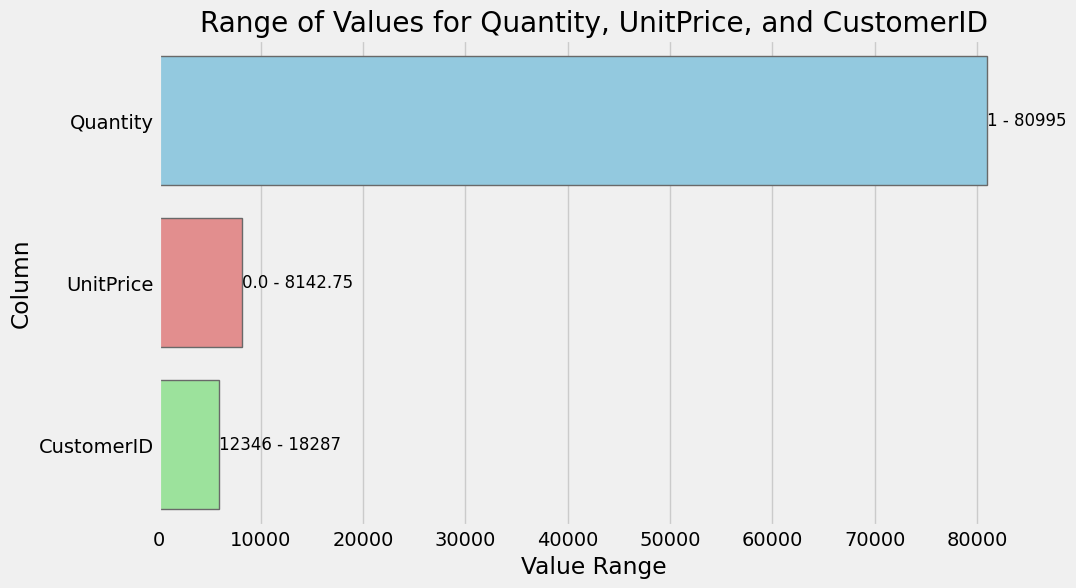

In [18]:
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')

columns = ['Quantity', 'UnitPrice', 'CustomerID']
ranges = [(df['Quantity'].min(), df['Quantity'].max()),
          (df['UnitPrice'].min(), df['UnitPrice'].max()),
          (df['CustomerID'].min(), df['CustomerID'].max())]

colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create a horizontal bar chart for Quantity, UnitPrice, and CustomerID ranges using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=[r[1] - r[0] for r in ranges], y=columns, palette=colors)
plt.title('Range of Values for Quantity, UnitPrice, and CustomerID')
plt.xlabel('Value Range')
plt.ylabel('Column')

# Display the range values as text labels on the right of the bars
for i, (column, range) in enumerate(zip(columns, ranges)):
    plt.text((range[1] - range[0]) + 10, i, f'{range[0]} - {range[1]}', va='center', fontsize=12)

plt.show()

In [19]:
# Calculate the revenue - the target
df['Revenue'] = df['UnitPrice'] * (df['Quantity'])

# Display the top 5 rows of the DataFrame
df.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue
InvoiceDate,,,,,,,,
2011-01-18 10:01:00,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346,United Kingdom,77183.6
2011-01-26 14:30:00,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,0.85,12347,Iceland,20.4
2010-12-07 14:57:00,537626,22729,ALARM CLOCK BAKELIKE ORANGE,4,3.75,12347,Iceland,15.0
2010-12-07 14:57:00,537626,22212,FOUR HOOK WHITE LOVEBIRDS,6,2.10,12347,Iceland,12.6
2010-12-07 14:57:00,537626,85167B,BLACK GRAND BAROQUE PHOTO FRAME,30,1.25,12347,Iceland,37.5


We are performing exploratory analysis on a dataset with a "Description" variable containing valuable product information. In this analysis, we extract relevant features from the descriptions and subsequently create clusters based on features to gain insights and explore patterns within the data.

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [22]:
# Define a function to extract keywords and their counts from the 'Description' column
def extract_keywords(dataframe, column='Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots = dict()
    keywords_select = dict()
    category_keys = []
    count_keywords = dict()

    # Iterate through each entry in the specified column
    for entry in dataframe[column]:
        if pd.isnull(entry):
            continue

        # Convert the text to lowercase and tokenize it
        lines = entry.lower()
        tokenized = nltk.word_tokenize(lines)

        # Extract nouns from the tokenized text
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if pos[:2] == 'NN']

        # Process each noun
        for noun in nouns:
            noun = noun.lower()
            root = stemmer.stem(noun)

            # Update keywords_roots and count_keywords dictionaries
            if root in keywords_roots:
                keywords_roots[root].add(noun)
                count_keywords[root] += 1
            else:
                keywords_roots[root] = {noun}
                count_keywords[root] = 1

    # Create a list of category keys and keywords_select
    for root in keywords_roots.keys():
        if len(keywords_roots[root]) > 1:
            min_length = 1000
            for keyword in keywords_roots[root]:
                if len(keyword) < min_length:
                    key = keyword
                    min_length = len(keyword)
            category_keys.append(key)
            keywords_select[root] = key
        else:
            category_keys.append(list(keywords_roots[root])[0])
            keywords_select[root] = list(keywords_roots[root])[0]

    print("Number of keywords in '{}': {}".format(column, len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

# Create a DataFrame of unique product descriptions
df_products = pd.DataFrame(df['Description'].unique()).rename(columns={0: 'Description'})

# Extract keywords and their counts
keywords, keywords_roots, keywords_select, count_keywords = extract_keywords(df_products)

# Sort the keywords by count in descending order
sorted_keywords = sorted(list(count_keywords.items()), key=lambda x: x[1], reverse=True)

Number of keywords in 'Description': 1477


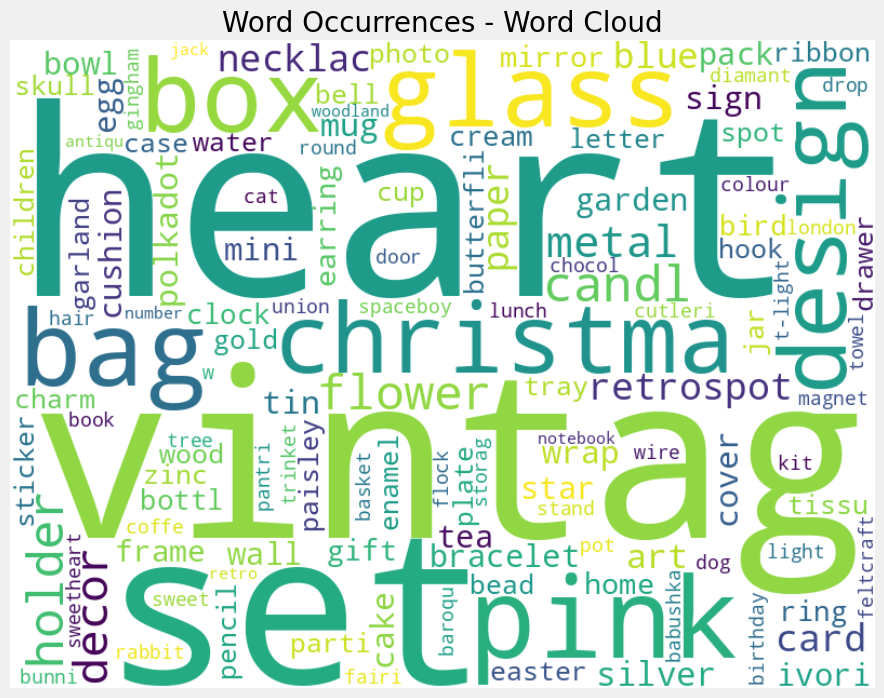

In [23]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(dict(sorted_keywords[:125]))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Occurrences - Word Cloud", fontsize=20)
plt.show()

In [24]:
# Get the top 10 most frequent words and their counts
top_10_words = sorted_keywords[:10]

# Create a DataFrame to store the data
df_top_10 = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

# Display the DataFrame
print(df_top_10)

       Word  Count
0     heart    267
1    vintag    210
2       set    206
3      pink    188
4       bag    164
5       box    153
6     glass    149
7  christma    137
8    design    128
9     candl    121


In [25]:
# Initialize an empty list to store selected words
selected_words = []

# Iterate through the count_keywords dictionary
for keyword, count in count_keywords.items():
    word = keywords_select[keyword]

    # Skip certain words and conditions
    if word in ['pink', 'blue', 'tag', 'green', 'orange']:
        continue
    if len(word) < 3 or count < 13:
        continue
    if ('+' in word) or ('/' in word):
        continue

    # Add the selected word and its count to the list
    selected_words.append([word, count])

# Sort the selected words by count in descending order
selected_words.sort(key=lambda x: x[1], reverse=True)

# Print the number of selected words
print('Selected words:', len(selected_words))

Selected words: 191


In [26]:
# Initialize an empty list to store selected words
selected_words = []

# Iterate through the count_keywords dictionary
for keyword, count in count_keywords.items():
    word = keywords_select[keyword]

    # Skip certain words and conditions
    if word in ['pink', 'blue', 'tag', 'green', 'orange']:
        continue
    if len(word) < 4 or count < 14:
        continue
    if ('+' in word) or ('/' in word):
        continue

    # Add the selected word and its count to the list
    selected_words.append([word, count])

# Sort the selected words by count in descending order
selected_words.sort(key=lambda x: x[1], reverse=True)

# Print the number of selected words
print('Selected words:', len(selected_words))

Selected words: 159


Now, create a matrix X, with help of one hot encoding, which will further help us to create the clusters.

The value of matrix's cell i,j will be 1 if selected word is in description.

Refer resultant matrix for more information.

In [27]:
unique_descriptions = df['Description'].unique()
X = pd.DataFrame()
for key, occurence in selected_words:
  X.loc[:, key] = list(map(lambda x:int(key.upper() in x), unique_descriptions))

In [28]:
# Display the matrix with the first 10-15 rows, description, and word columns
matrix_with_desc_word = X.iloc[:15, :].copy()
matrix_with_desc_word.insert(0, 'Description', unique_descriptions[:15])

print(matrix_with_desc_word)

                            Description  heart  vintage  glass  christmas  \
0    WHITE HANGING HEART T-LIGHT HOLDER      1        0      0          0   
1                   WHITE METAL LANTERN      0        0      0          0   
2        CREAM CUPID HEARTS COAT HANGER      1        0      0          0   
3   KNITTED UNION FLAG HOT WATER BOTTLE      0        0      0          0   
4        RED WOOLLY HOTTIE WHITE HEART.      1        0      0          0   
5          SET 7 BABUSHKA NESTING BOXES      0        0      0          0   
6     GLASS STAR FROSTED T-LIGHT HOLDER      0        0      1          0   
7                HAND WARMER UNION JACK      0        0      0          0   
8             HAND WARMER RED POLKA DOT      0        0      0          0   
9         ASSORTED COLOUR BIRD ORNAMENT      0        0      0          0   
10           POPPY'S PLAYHOUSE BEDROOM       0        0      0          0   
11            POPPY'S PLAYHOUSE KITCHEN      0        0      0          0   

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is a DataFrame
matrix = X.values

cluster_sizes = [3, 4, 5, 6, 7, 8]
for n_clusters in cluster_sizes:
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.14093096211813771
For n_clusters = 4 The average silhouette_score is : 0.15111287132099852
For n_clusters = 5 The average silhouette_score is : 0.12693462226739197
For n_clusters = 6 The average silhouette_score is : 0.12565248526560224
For n_clusters = 7 The average silhouette_score is : 0.12422222065829995
For n_clusters = 8 The average silhouette_score is : 0.132010048570961


Detect and remove outliers.

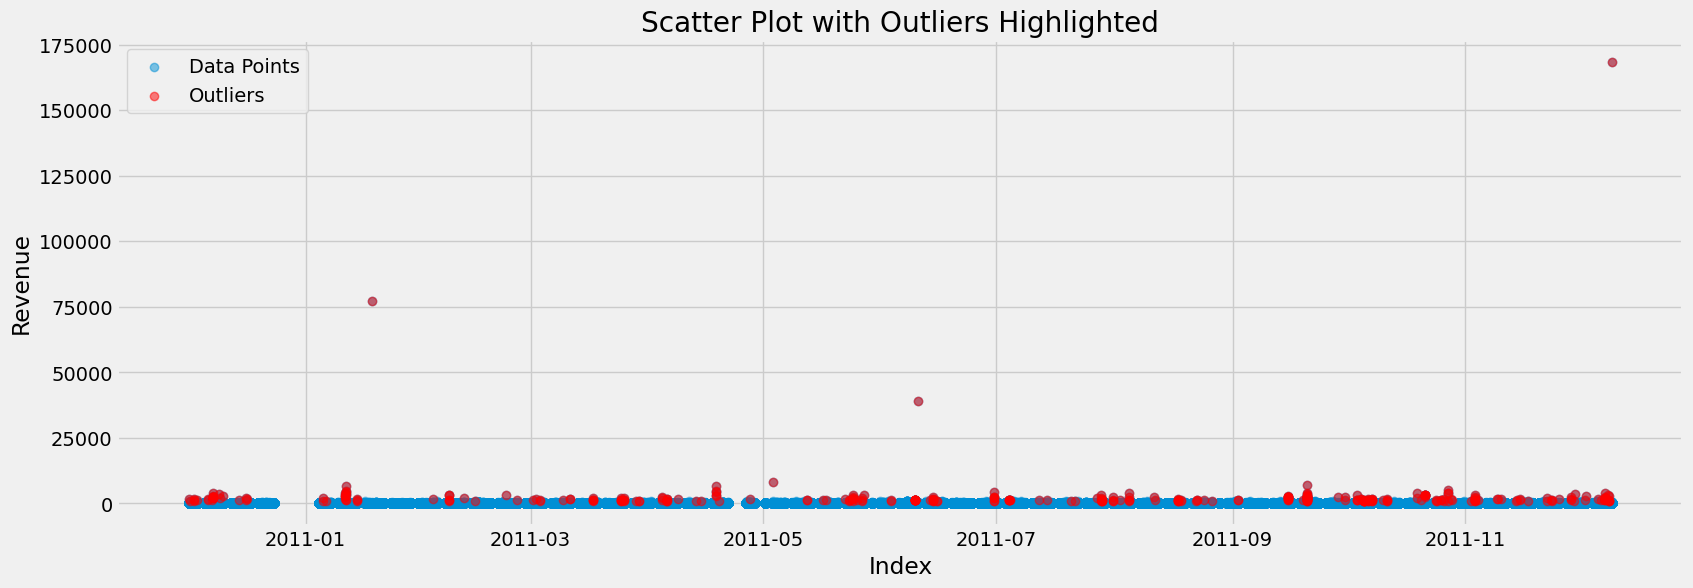

In [30]:
# Assuming df contains data
z_scores = np.abs(stats.zscore(df['Revenue']))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Create a boolean mask to identify outliers
outliers = z_scores > threshold

# Create a scatter plot with outliers highlighted
plt.figure(figsize=(18, 6))
plt.scatter(x=df.index, y=df['Revenue'], label='Data Points', alpha=0.5)
plt.scatter(x=df.index[outliers], y=df['Revenue'][outliers], c='red', label='Outliers', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.legend()
plt.title('Scatter Plot with Outliers Highlighted')
plt.show()

In [31]:
# remove obvious outliers
df = df[df['Revenue'] < 25000]

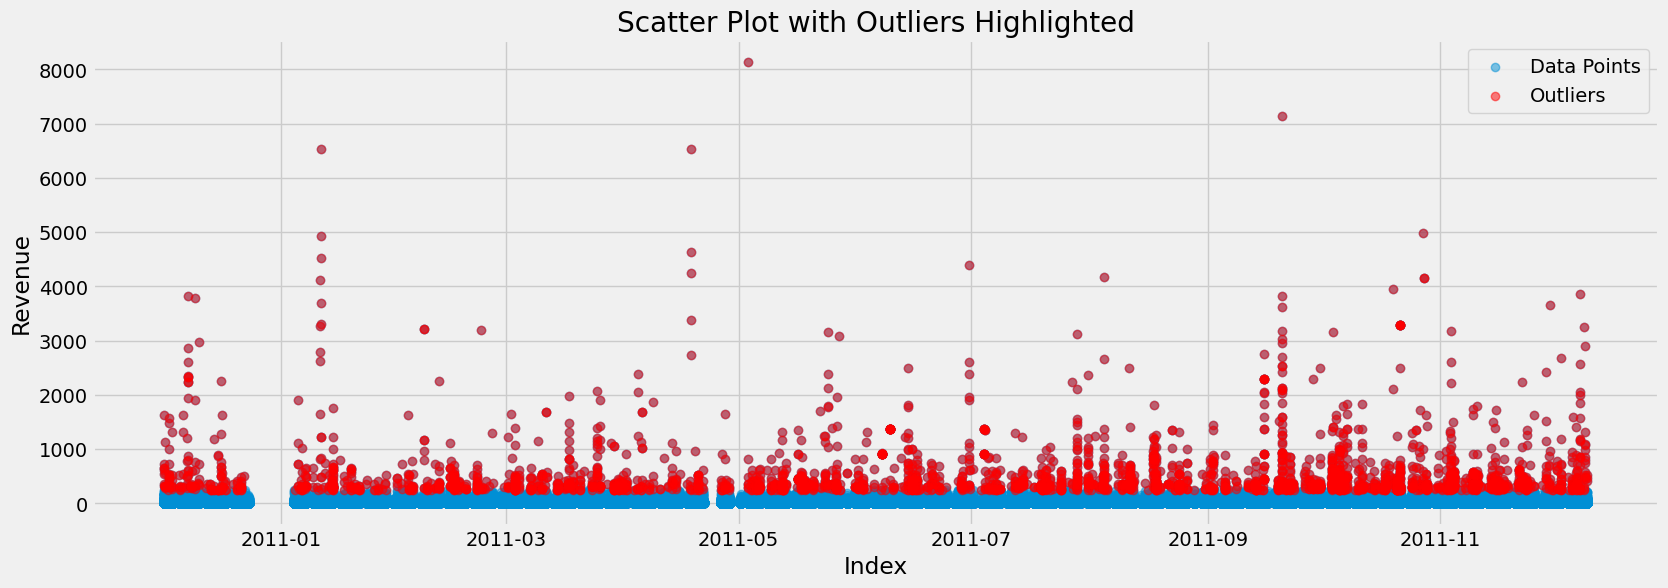

In [32]:
# Assuming df contains data
z_scores = np.abs(stats.zscore(df['Revenue']))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Create a boolean mask to identify outliers
outliers = z_scores > threshold

# Create a scatter plot with outliers highlighted
plt.figure(figsize=(18, 6))
plt.scatter(x=df.index, y=df['Revenue'], label='Data Points', alpha=0.5)
plt.scatter(x=df.index[outliers], y=df['Revenue'][outliers], c='red', label='Outliers', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.legend()
plt.title('Scatter Plot with Outliers Highlighted')
plt.show()

In [33]:
df.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

,Quantity,UnitPrice,CustomerID,Revenue
0.050,1.0,0.42,12626.0,1.25000
0.950,36.0,8.50,17905.0,67.50000
0.980,96.0,12.75,18119.0,138.24000
0.990,120.0,14.95,18211.0,203.52000
0.999,504.0,49.95,18283.0,876.45864


In [34]:
df = df[df['Revenue'] < 139]

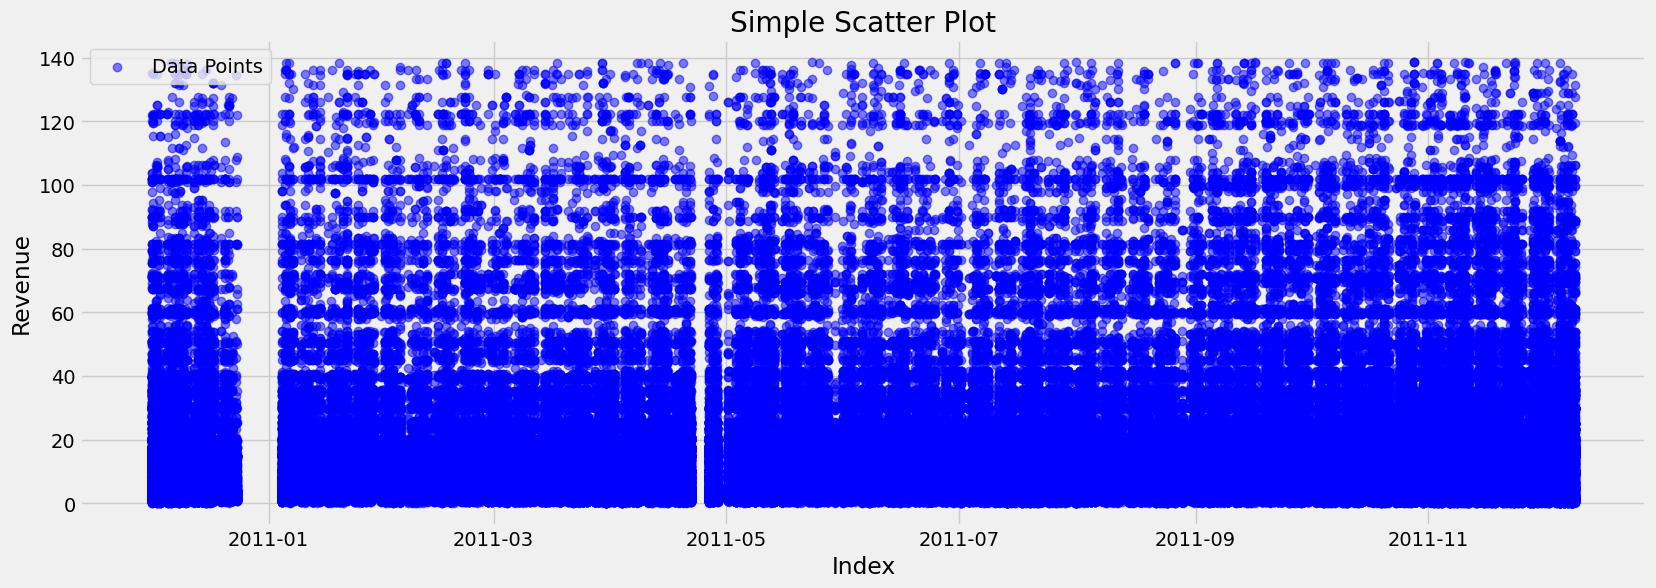

In [35]:
plt.figure(figsize=(18, 6))
plt.scatter(x=df.index, y=df['Revenue'], label='Data Points', alpha=0.5, c='blue')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.legend()
plt.title('Simple Scatter Plot')
plt.show()

### 3.3 Model development and training

In [36]:
df.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,384916.000000,384916.000000,384916.000000,384916.000000
mean,9.837531,2.884517,15290.500574,15.783951
std,26.969007,3.434552,1712.322477,17.911143
min,1.000000,0.000000,12347.000000,0.000000
25%,2.000000,1.250000,13959.000000,4.920000
50%,5.000000,1.950000,15155.000000,11.700000
75%,12.000000,3.750000,16794.000000,18.720000
max,12540.000000,134.000000,18287.000000,138.720000


In [37]:
df_model = df[df['UnitPrice'] < 15]

df_groupby = df_model.groupby('InvoiceNo')[['Quantity']].sum()

df_groupby = df_groupby.reset_index()
df_groupby.head()

df_model['InvoiceDate'] = df_model.index
df_model = df_model.merge(df_groupby, how='left', on='InvoiceNo')
df_model = df_model.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityPerInvoice'})
df_model.tail(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,InvoiceDate,QuantityPerInvoice
381503,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,2011-12-09 12:50:00,105
381504,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680,France,14.85,2011-12-09 12:50:00,105


In [38]:
df_model['InvoiceDate'] = pd.to_datetime(df_model['InvoiceDate'])

Grouping based on Exploratory data analysis.

In [39]:
# Define quantity bins
quantity_bins = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])

# Create a new column 'QuantityRange' with bin labels for Quantity
df_model['QuantitySegment'] = pd.cut(df_model['Quantity'], bins=quantity_bins)

# Define price bins
price_bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])

# Create a new column 'PriceRange' with bin labels for UnitPrice
df_model['PriceSegment'] = pd.cut(df_model['UnitPrice'], bins=price_bins)

df_model.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,InvoiceDate,QuantityPerInvoice,QuantitySegment,PriceSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"


Introducing a 'month' feature could enhance the model's predictive accuracy, considering that sales have shown variation across different months. This feature is likely to be valuable for the model. Also, create feature related to quarter, because there has been trend shown for each quarter in EDA.

In [40]:
df_model['Month'] = df_model['InvoiceDate'].dt.month
df_model.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,InvoiceDate,QuantityPerInvoice,QuantitySegment,PriceSegment,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12


In [41]:
# Define date bins
date_bins = pd.IntervalIndex.from_tuples([(0, 3), (3, 6), (6, 9), (9, 12)])

# Create a new column 'DateRange' with bin labels for the 'Month' column
df_model['Quarter'] = pd.cut(df_model['Month'], bins=date_bins, labels=['q1', 'q2', 'q3', 'q4'])

df_model.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,InvoiceDate,QuantityPerInvoice,QuantitySegment,PriceSegment,Month,Quarter
381500,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,2011-12-09 12:50:00,105,"(11, 14]","(0, 1]",12,"(9, 12]"
381501,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,2011-12-09 12:50:00,105,"(5, 8]","(2, 3]",12,"(9, 12]"
381502,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"
381503,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"
381504,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680,France,14.85,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"


The availability of invoices for the UK compared to the rest of the world shows notable differences, suggesting potential patterns in the data.

In [82]:
df_uk = df_model[df_model['Country'] == 'United Kingdom']
df_non_uk = df_model[df_model['Country'] != 'United Kingdom']
df_all = df_model

In [83]:
df_uk_data = df_uk[['Revenue', 'QuantityPerInvoice', 'QuantitySegment', 'PriceSegment', 'Quarter']]
df_uk_data.head()

,Revenue,QuantityPerInvoice,QuantitySegment,PriceSegment,Quarter
0,15.30,40,"(5, 8]","(2, 3]","(9, 12]"
1,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
2,22.00,40,"(5, 8]","(2, 3]","(9, 12]"
3,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
4,20.34,40,"(5, 8]","(3, 4]","(9, 12]"


In [60]:
df_non_uk_data = df_non_uk[['Revenue', 'QuantityPerInvoice', 'QuantitySegment', 'PriceSegment', 'Quarter']]
df_non_uk_data.head()

,Revenue,QuantityPerInvoice,QuantitySegment,PriceSegment,Quarter
26,90.0,446,"(15, 5000]","(3, 4]","(9, 12]"
27,90.0,446,"(15, 5000]","(3, 4]","(9, 12]"
28,45.0,446,"(11, 14]","(3, 4]","(9, 12]"
29,10.2,446,"(11, 14]","(0, 1]","(9, 12]"
30,15.6,446,"(15, 5000]","(0, 1]","(9, 12]"


In [70]:
df_all_data = df_all[['Revenue', 'QuantityPerInvoice', 'QuantitySegment', 'PriceSegment', 'Quarter']]
df_all_data.head()

,Revenue,QuantityPerInvoice,QuantitySegment,PriceSegment,Quarter
0,15.30,40,"(5, 8]","(2, 3]","(9, 12]"
1,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
2,22.00,40,"(5, 8]","(2, 3]","(9, 12]"
3,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
4,20.34,40,"(5, 8]","(3, 4]","(9, 12]"


In [84]:
df_detail_data_uk = df_uk_data.copy()
df_detail_data_uk = pd.get_dummies(df_detail_data_uk, columns=['QuantitySegment'], prefix='qr')
df_detail_data_uk = pd.get_dummies(df_detail_data_uk, columns=['PriceSegment'], prefix='pr')
df_detail_data_uk = pd.get_dummies(df_detail_data_uk, columns=['Quarter'], prefix='dr')
df_detail_data_uk.head()

,Revenue,QuantityPerInvoice,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [61]:
df_detail_data_non_uk = df_non_uk_data.copy()
df_detail_data_non_uk = pd.get_dummies(df_detail_data_non_uk, columns=['QuantitySegment'], prefix='qr')
df_detail_data_non_uk = pd.get_dummies(df_detail_data_non_uk, columns=['PriceSegment'], prefix='pr')
df_detail_data_non_uk = pd.get_dummies(df_detail_data_non_uk, columns=['Quarter'], prefix='dr')
df_detail_data_non_uk.head()

,Revenue,QuantityPerInvoice,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
26,90.0,446,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
27,90.0,446,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
28,45.0,446,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
29,10.2,446,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
30,15.6,446,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [71]:
df_detail_data_all = df_all_data.copy()
df_detail_data_all = pd.get_dummies(df_detail_data_all, columns=['QuantitySegment'], prefix='qr')
df_detail_data_all = pd.get_dummies(df_detail_data_all, columns=['PriceSegment'], prefix='pr')
df_detail_data_all = pd.get_dummies(df_detail_data_all, columns=['Quarter'], prefix='dr')
df_detail_data_all.head()

,Revenue,QuantityPerInvoice,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [85]:
df_detail_data_uk['QuantityPerInvoice'] = scale(df_detail_data_uk['QuantityPerInvoice'])

In [90]:
df_detail_data_non_uk['QuantityPerInvoice'] = scale(df_detail_data_non_uk['QuantityPerInvoice'])

In [72]:
df_detail_data_all['QuantityPerInvoice'] = scale(df_detail_data_all['QuantityPerInvoice'])

In [87]:
y_uk = df_detail_data_uk['Revenue']
X_uk = df_detail_data_uk.drop(columns=['Revenue'])

In [63]:
y_non_uk = df_detail_data_non_uk['Revenue']
X_non_uk = df_detail_data_non_uk.drop(columns=['Revenue'])

In [73]:
y_all = df_detail_data_all['Revenue']
X_all = df_detail_data_all.drop(columns=['Revenue'])

In [88]:
X_train_uk, X_test_uk, y_train_uk, y_test_uk = train_test_split(X_uk, y_uk, test_size = 0.20, random_state=30)

In [64]:
X_train_non_uk, X_test_non_uk, y_train_non_uk, y_test_non_uk = train_test_split(X_non_uk, y_non_uk, test_size = 0.20, random_state=30)

In [74]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.20, random_state=30)

In [48]:
pip install xgboost

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def train_regression_models(X_train, y_train):
    # Preprocess column names
    X_train.columns = X_train.columns.str.replace('[', '').str.replace(']', '')

    # Define models and their hyperparameter grids
    linear_model = LinearRegression()
    fit_intercepts = [True, False]
    param_grid_linear = dict(fit_intercept=fit_intercepts)

    tree_model = DecisionTreeRegressor()
    min_tree_splits = [2]
    min_tree_leaves = [2]
    param_grid_tree = dict(min_samples_split=min_tree_splits, min_samples_leaf=min_tree_leaves)

    forest_model = RandomForestRegressor()
    estimators_space = [100]
    min_sample_splits = [2, 3]
    min_sample_leaves = [2]
    param_grid_forest = dict(n_estimators=estimators_space, min_samples_split=min_sample_splits, min_samples_leaf=min_sample_leaves)

    xgb_model = XGBRegressor()
    xgb_param_grid = dict(
        learning_rate=[0.01, 0.1, 0.2],
        n_estimators=[100, 200, 300],
        max_depth=[3, 4, 5]
    )

    # Create dictionaries to store models and their corresponding hyperparameter grids
    regression_models = {
        'LinearRegression': (linear_model, param_grid_linear),
        'DecisionTreeRegressor': (tree_model, param_grid_tree),
        'RandomForest': (forest_model, param_grid_forest),
        'XGBoost': (xgb_model, xgb_param_grid)
    }

    cv = 5

    # Train models and store the best estimators
    best_est_dict = {}
    for model_name, (model, param_grid) in regression_models.items():
        regressor = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1)
        regressor.fit(X_train, y_train)
        best_est_dict[model_name] = regressor.best_estimator_

    return best_est_dict

### 3.3 Model evaluation

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(X_test, y_test, best_est_dict):
    # Preprocess column names in the test set
    X_test.columns = X_test.columns.str.replace('[', '').str.replace(']', '')

    # Initialize dictionaries to store metrics
    mae_dict = {}
    mse_dict = {}
    r2_dict = {}
    best_params_dict = {}
    best_score_dict = {}

    for model_name, best_estimator in best_est_dict.items():
        y_pred = best_estimator.predict(X_test)

        print(" ---------- {} ----------".format(model_name))

        # Compute and store metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mae_dict[model_name] = mae
        mse_dict[model_name] = mse
        r2_dict[model_name] = r2

        print("MAE for {}: {}".format(model_name, mae))
        print("MSE for {}: {}".format(model_name, mse))
        print("R2 score for {}: {}".format(model_name, r2))

        # Print and store tuned parameters and best score
        best_params = best_est_dict[model_name].get_params()
        best_score = best_estimator.score(X_test, y_test)

        print("Tuned Parameters for {}: {}".format(model_name, best_params))
        best_params_dict[model_name] = best_params
        print("Best score for {}: {}".format(model_name, best_score))
        best_score_dict[model_name] = best_score

        print(" ---------- {} ---------- \n".format(model_name))

In [89]:
# UK
print("----------------------------------- UK -----------------------------------")

# Step 1: Train the models and get the best estimators
best_est_dict = train_regression_models(X_train_uk, y_train_uk)

# Step 2: Evaluate the models on the test data
evaluate_models(X_test_uk, y_test_uk, best_est_dict)

----------------------------------- UK -----------------------------------
 ---------- LinearRegression ----------
MAE for LinearRegression: 6.643916513625835
MSE for LinearRegression: 128.1703066268497
R2 score for LinearRegression: 0.5538367174557999
Tuned Parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best score for LinearRegression: 0.5538367174557999
 ---------- LinearRegression ---------- 

 ---------- DecisionTreeRegressor ----------
MAE for DecisionTreeRegressor: 3.9216179752776217
MSE for DecisionTreeRegressor: 71.86688382145982
R2 score for DecisionTreeRegressor: 0.7498300063730348
Tuned Parameters for DecisionTreeRegressor: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Best score for DecisionTreeReg

In [100]:
# NON UK
print("----------------------------------- NON-UK -----------------------------------")

# Step 1: Train the models and get the best estimators
best_est_dict_non_uk = train_regression_models(X_train_non_uk, y_train_non_uk)

# Step 2: Evaluate the models on the test data
evaluate_models(X_test_non_uk, y_test_non_uk, best_est_dict_non_uk)

----------------------------------- NON-UK -----------------------------------
 ---------- LinearRegression ----------
MAE for LinearRegression: 9.052191136950368
MSE for LinearRegression: 198.46917183713816
R2 score for LinearRegression: 0.5561935124654714
Tuned Parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best score for LinearRegression: 0.5561935124654714
 ---------- LinearRegression ---------- 

 ---------- DecisionTreeRegressor ----------
MAE for DecisionTreeRegressor: 5.681308559283448
MSE for DecisionTreeRegressor: 129.22234748452885
R2 score for DecisionTreeRegressor: 0.7110396762519083
Tuned Parameters for DecisionTreeRegressor: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Best score for DecisionTr

In [75]:
print("----------------------------------- ALL -----------------------------------")

# Step 1: Train the models and get the best estimators
best_est_dict_all = train_regression_models(X_train_all, y_train_all)

# Step 2: Evaluate the models on the test data
evaluate_models(X_test_all, y_test_all, best_est_dict_all)

----------------------------------- ALL -----------------------------------
 ---------- LinearRegression ----------
MAE for LinearRegression: 7.047910966863617
MSE for LinearRegression: 142.1880407151712
R2 score for LinearRegression: 0.550620856423177
Tuned Parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best score for LinearRegression: 0.550620856423177
 ---------- LinearRegression ---------- 

 ---------- DecisionTreeRegressor ----------
MAE for DecisionTreeRegressor: 4.093279858138094
MSE for DecisionTreeRegressor: 77.04281037193554
R2 score for DecisionTreeRegressor: 0.7565095350526345
Tuned Parameters for DecisionTreeRegressor: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Best score for DecisionTreeRegre

### 3.4 Analysis

This analysis compares the performance of various regression models (RandomForest, DecisionTreeRegressor, LinearRegression, XGBoost) across different regions (UK, Non-UK, and All Countries) in predicting e-commerce data trends. It assesses each model's effectiveness based on their R2 scores, Mean Absolute Error (MAE), and Mean Squared Error (MSE), providing insights into their suitability for specific datasets and overall predictive accuracy.

**UK Region:** In the UK region, the RandomForest model demonstrated the best performance with the highest R2 score (0.763) and the lowest MAE (3.872) and MSE (67.975). DecisionTreeRegressor also showed strong results with a competitive R2 score (0.750). In contrast, LinearRegression had significantly higher error rates, indicating it was less effective for this dataset. XGBoost, with an R2 score of 0.756, positioned itself between RandomForest and DecisionTreeRegressor in terms of effectiveness.

**Non-UK Region:** In the Non-UK region, RandomForest again leads in performance with the lowest MAE (5.650) and MSE (121.314), and a strong R2 score of 0.729. DecisionTreeRegressor and XGBoost follow closely in effectiveness with R2 scores of 0.711 and 0.721 respectively. LinearRegression lags behind in this region as well, indicating its lesser suitability for this dataset compared to the other models.

**All Countries:** For the combined dataset representing all countries, RandomForest model again emerged as the most effective, achieving the highest R2 score (0.770) and the lowest MAE (4.050) and MSE (72.918). DecisionTreeRegressor and XGBoost also demonstrated strong performances, with R2 scores of 0.757 and 0.746 respectively. LinearRegression, however, lagged behind with the highest error metrics and the lowest R2 score (0.551), suggesting it was less suitable for this comprehensive dataset.

In the UK, Non-UK, and All Countries datasets, RandomForest consistently demonstrated superior performance with the highest R2 scores and lowest error rates (MAE and MSE), indicating its robust predictive accuracy. DecisionTreeRegressor and XGBoost also showed strong results, particularly in the UK and All Countries datasets, but were slightly outperformed by RandomForest. LinearRegression consistently exhibited the highest error metrics and the lowest R2 scores across all regions, indicating its relative ineffectiveness for this dataset. This analysis highlights RandomForest's potential for reliable and accurate predictions in diverse e-commerce data scenarios.

The improved performance of the models, particularly RandomForest, demonstrates the efficacy in predicting e-commerce revenue. This ability to accurately forecast sales outcomes based on various customer behaviors and market trends offers significant benefits for e-commerce platforms. It enables them to optimize marketing strategies, manage inventory efficiently, and enhance overall customer engagement by anticipating and meeting customer needs more effectively.

### 3.5 References

1. BigCommerce. (n.d.). Machine Learning in E-commerce: The New Frontier in Online Shopping. Retrieved from https://www.bigcommerce.com/articles/ecommerce/machine-learning/
2. Analytics Vidhya. (2021). Know the Best Evaluation Metrics for your Regression Model. Retrieved from https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
3. ScienceDirect. (n.d.). Random Forest - an overview. Retrieved from https://www.sciencedirect.com/topics/engineering/random-forest
4. Simplilearn. (n.d.). What is XGBoost Algorithm in Machine Learning? Retrieved from https://www.simplilearn.com/what-is-xgboost-algorithm-in-machine-learning-article
5. UpGrad. (n.d.). Data Preprocessing in Machine Learning. Retrieved from https://www.upgrad.com/blog/data-preprocessing-in-machine-learning/